In [1]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.parse
from glob import glob
import ntpath 
import re

## Data processing

### Reading 2G

In [2]:
# reading 2G.csv
file='Data/2G.csv'


data_2G=pd.read_csv(file,sep=';') 
print('length:{}'.format(len(data_2G)))
print('number of features:{}'.format(len(data_2G.columns)))

#data_2G.head()

#Subsetting the dataset taking only Loreto Region 
data_2G_Loreto=data_2G[data_2G['Región']=='LORETO']
old_index=list(data_2G_Loreto.index)
new_index=list(range(len(data_2G_Loreto)))
re_index=dict(zip(old_index,new_index))
data_2G_Loreto.reindex(index=re_index)


data_2G_Loreto['LOCALCOD']=data_2G_Loreto['Código UBIGEO (10 Digitos)'].astype(str)
#type(data_2G_Loreto['LOCALCOD'])
#re_index
#data_2G_Loreto

length:17981
number of features:8


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Reading Larva

In [3]:
# reading larva.csv
file='Data/larva_final.csv'


data_larva=pd.read_csv(file) 
print('length:{}'.format(len(data_larva)))
print('number of features:{}'.format(len(data_larva.columns)))

l=list(set(data_larva['BUILDING']))
print(len(l))


data_larva.head()

#col_larva=pd.DataFrame(list(data_larva.columns))
#col_larva[]

length:474664
number of features:13
1256


,Unnamed: 0,Unnamed: 0.1,X1,Unnamed: 0.1.1,CUVI,BUILDING,DATE,LARVA,LATITUDE,LONGITUDE,YEAR,MONTH,SEASON
0,0,1,152493,152605,9XSJ4F2UGUUS11G,MERCADILLO,1.484611e+09,0.0,-3.702633,-73.249201,2017.0,1.0,WETTEST
1,1,2,155867,155979,9XSJ4F2UGUUS11G,MERCADILLO,1.493856e+09,0.0,-3.702633,-73.249201,2017.0,5.0,DRY
2,2,3,159241,159353,9XSJ4F2UGUUS11G,MERCADILLO,1.500854e+09,0.0,-3.702633,-73.249201,2017.0,7.0,DRY
3,3,4,166059,166171,9XSJ4F2UGUUS11G,CLUB NAUTICA DE CAZA Y PESCA,1.514333e+09,0.0,-3.702633,-73.249201,2017.0,12.0,WET
4,8,9,162685,162797,9XSJ4F2UGUUS11G,CLUB NAUTICA DE CAZA Y PESCA,1.510013e+09,NaN,-3.702633,-73.249201,2017.0,11.0,WET


### Reading Mosquito

In [4]:
# reading mosquito.csv
file='Data/mos_final.csv'

data_mosquito=pd.read_csv(file) 
print('length:{}'.format(len(data_mosquito)))
print('number of features:{}'.format(len(data_mosquito.columns)))

data_mosquito['LOCALCOD']=data_mosquito['LOCALCOD'].astype(str)

#checking data cleaning to find anormal patterns in 'LOCALCOD'
l=list(set(data_mosquito['LOCALCOD']))
#print(l)
char_list=[s for s in l if re.search('[a-z]',s)]
num_list=[s for s in l if re.search('\d{10}',s)]
blank_list=[s for s in l if re.search('\s',s)]
blank_list
#char_list
#len(data_mosquito)-len(num_list[0])

# number of LOCALCOD
len(list(set(data_mosquito['LOCALCOD'])))
#data_mosquito['LOCALCOD'].value_counts()

data_mosquito.head()

length:431587
number of features:15


,Unnamed: 0,Unnamed: 0.1,FECHA_ING,PERS ID,DIAGNO,UBIGEO,LOCALCOD,EDAD,SEXO,Year,Month,Day,Disease,Larva,Season
0,0,6223,2008-12-12,PA069-SH3,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,12,12,MALARIA,PFALCIPARUM,RAINY
1,1,6225,2008-12-12,PA069-SH1,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,12,12,MALARIA,PFALCIPARUM,RAINY
2,2,6227,2010-01-18,PE001BEDAR1,DENGUE SIN SEÐALES DE ALARMA,160101,1601010001,37,M,2010,1,18,DENGUE,SIN,WETTEST
3,3,6228,2010-01-18,AY062ROBAJ1,MALARIA VIVAX,160106,1601060062,12,M,2010,1,18,MALARIA,VIVAX,WETTEST
4,4,6229,2010-01-25,VI024MARHU1,MALARIA VIVAX,160304,1603040024,20,F,2010,1,25,MALARIA,VIVAX,WETTEST


### Merging 2G & Mosquito

In [5]:
#Merging 2G & cleaned mosquito

Data_2G_mosquito=pd.merge(data_mosquito,data_2G_Loreto, how='left',on='LOCALCOD')
print(len(Data_2G_mosquito))
Data_2G_mosquito.head()

431587


,Unnamed: 0,Unnamed: 0.1,FECHA_ING,PERS ID,DIAGNO,UBIGEO,LOCALCOD,EDAD,SEXO,Year,...,Larva,Season,Código UBIGEO (10 Digitos),Centro poblado,Distrito,Provincia,Región,LATITUD,LONGITUD,CLASIFICACIÓN INEI
0,0,6223,2008-12-12,PA069-SH3,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,...,PFALCIPARUM,RAINY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6225,2008-12-12,PA069-SH1,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,...,PFALCIPARUM,RAINY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6227,2010-01-18,PE001BEDAR1,DENGUE SIN SEÐALES DE ALARMA,160101,1601010001,37,M,2010,...,SIN,WETTEST,1.601010e+09,IQUITOS,IQUITOS,MAYNAS,LORETO,-3.749930,-73.26217,URBANO
3,3,6228,2010-01-18,AY062ROBAJ1,MALARIA VIVAX,160106,1601060062,12,M,2010,...,VIVAX,WETTEST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6229,2010-01-25,VI024MARHU1,MALARIA VIVAX,160304,1603040024,20,F,2010,...,VIVAX,WETTEST,1.603040e+09,SAN JUAN DE TROMPETEROS CAMPESINO,TROMPETEROS,LORETO,LORETO,-3.807801,-75.07599,RURAL


In [6]:
# checking the missing values & merge
#data_2G_Loreto.head()
miss_val=sum(Data_2G_mosquito['Centro poblado'].isnull())
print(miss_val/len(Data_2G_mosquito))

l=len(list(set(data_mosquito['LOCALCOD'])))
l2=data_2G_Loreto.shape[0]
data_mosquito['LOCALCOD'].value_counts()
l-l2

0.6103265390292107


3592

In [7]:
#pd.concat([s1, s2, s3])
#pd.concat([data_mosquito, data_2G_Loreto],axis=1)

In [8]:
#using join
#type(data_mosquito['LOCALCOD'][0])
#type(data_2G_Loreto['LOCALCOD'][13439])
#data_mosquito.join(data_2G_Loreto,on='LOCALCOD')

# Data Visualisation

In [9]:
import seaborn as sns

https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

https://python-graph-gallery.com/heatmap/

### Heatmaps for categorical variables > use Bokeh
http://bokeh.pydata.org/en/0.11.1/docs/gallery/heatmap_chart.html

### Correlations to check 
* Larva Inspection / Mengue
* Mengue / Malaria 
* Malaria / Weather
* Mengue / Weather
* Age / Disease
* Sex / Disease

In [10]:
data_mosquito.head()

,Unnamed: 0,Unnamed: 0.1,FECHA_ING,PERS ID,DIAGNO,UBIGEO,LOCALCOD,EDAD,SEXO,Year,Month,Day,Disease,Larva,Season
0,0,6223,2008-12-12,PA069-SH3,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,12,12,MALARIA,PFALCIPARUM,RAINY
1,1,6225,2008-12-12,PA069-SH1,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,12,12,MALARIA,PFALCIPARUM,RAINY
2,2,6227,2010-01-18,PE001BEDAR1,DENGUE SIN SEÐALES DE ALARMA,160101,1601010001,37,M,2010,1,18,DENGUE,SIN,WETTEST
3,3,6228,2010-01-18,AY062ROBAJ1,MALARIA VIVAX,160106,1601060062,12,M,2010,1,18,MALARIA,VIVAX,WETTEST
4,4,6229,2010-01-25,VI024MARHU1,MALARIA VIVAX,160304,1603040024,20,F,2010,1,25,MALARIA,VIVAX,WETTEST


In [11]:
#data_mosquito.groupby(by='DIAGNO').size()
print(len(list(set(data_mosquito['UBIGEO']))))
#print(len(list(set(data_mosquito['LOCALCOD']))))
data_mosquito['EDAD']=data_mosquito['EDAD'].apply(int)
#data_mosquito['EDAD'].dtype

ages=list(set(data_mosquito['EDAD']))
#ages_int=[list(map(int,x) for x in ages)]
#ages_int
#[list(map(int, x[2:])) for x in A]
data_mosquito['EDAD'].describe()

bins=[1,15,30,45,60,90]
EDAD_BINS=pd.cut(data_mosquito['EDAD'],bins)
data_mosquito['EDAD_BINS']=EDAD_BINS
data_mosquito.head()

53


,Unnamed: 0,Unnamed: 0.1,FECHA_ING,PERS ID,DIAGNO,UBIGEO,LOCALCOD,EDAD,SEXO,Year,Month,Day,Disease,Larva,Season,EDAD_BINS
0,0,6223,2008-12-12,PA069-SH3,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,12,12,MALARIA,PFALCIPARUM,RAINY,"(15, 30]"
1,1,6225,2008-12-12,PA069-SH1,MALARIA PFALCIPARUM,160103,1601030069,22,F,2008,12,12,MALARIA,PFALCIPARUM,RAINY,"(15, 30]"
2,2,6227,2010-01-18,PE001BEDAR1,DENGUE SIN SEÐALES DE ALARMA,160101,1601010001,37,M,2010,1,18,DENGUE,SIN,WETTEST,"(30, 45]"
3,3,6228,2010-01-18,AY062ROBAJ1,MALARIA VIVAX,160106,1601060062,12,M,2010,1,18,MALARIA,VIVAX,WETTEST,"(1, 15]"
4,4,6229,2010-01-25,VI024MARHU1,MALARIA VIVAX,160304,1603040024,20,F,2010,1,25,MALARIA,VIVAX,WETTEST,"(15, 30]"


In [12]:
years=list(set(data_mosquito['Year']))
#years

In [13]:
list(set(data_mosquito['Disease']))

['MALARIA', 'DENGUE']

In [35]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [16]:
counts = data_mosquito['DIAGNO'].value_counts()
list(counts.values)

[275705, 88723, 56233, 9962, 448, 442, 74]

In [17]:
#data_mosquito.groupby(by=['DIAGNO','Year']).size()

In [18]:
import seaborn as sns
#sns.stripplot('DIAGNO', 'Year', data=data_mosquito)

### 1. Heatmap of mosquito dataset

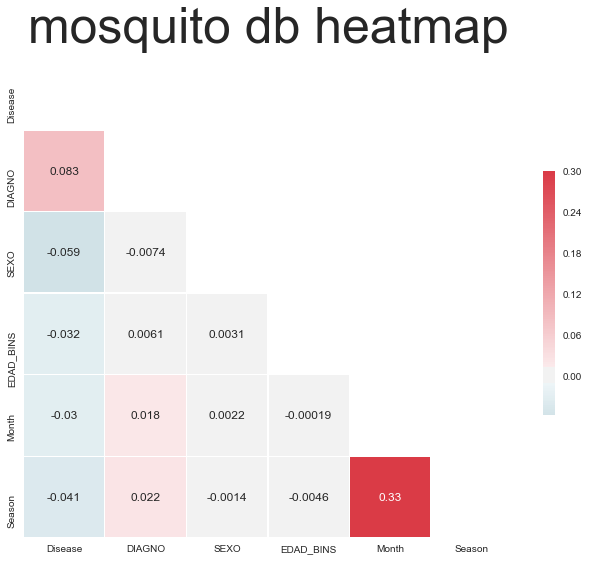

In [19]:
# heatmap of mosquito dataset

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = data_mosquito.loc[:,['Disease','DIAGNO','SEXO','EDAD_BINS','Month','Season']]

# Compute the correlation matrix
corr = d.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plot1=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#ax = plt.axes()
#sns.heatmap(data, ax = ax)

ax.set_title('mosquito db heatmap',fontsize=50)
#plt.show()
f.savefig("mos_heatmap.png")

In [36]:
print('Diseases:{}'.format(list(set(data_mosquito['Disease']))))
print('Diagnosis:{}'.format(list(set(data_mosquito['DIAGNO']))))
print('Seasons:{}'.format(list(set(data_mosquito['Season']))))

Diseases:['MALARIA', 'DENGUE']
Diagnosis:['MALARIA PMALARIAE', 'MALARIA MIXTA', 'DENGUE SIN SEÐALES DE ALARMA', 'DENGUE GRAVE', 'MALARIA PFALCIPARUM', 'MALARIA VIVAX', 'DENGUE CON SEÐAL DE ALARMA']
Seasons:['WETTEST', 'DRY', 'RAINY']


### 2. Disease counts by Age bins and Diagnosis

In [21]:
d=data_mosquito.loc[:,['DIAGNO','SEXO','EDAD_BINS','Month','Season']]
#d.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

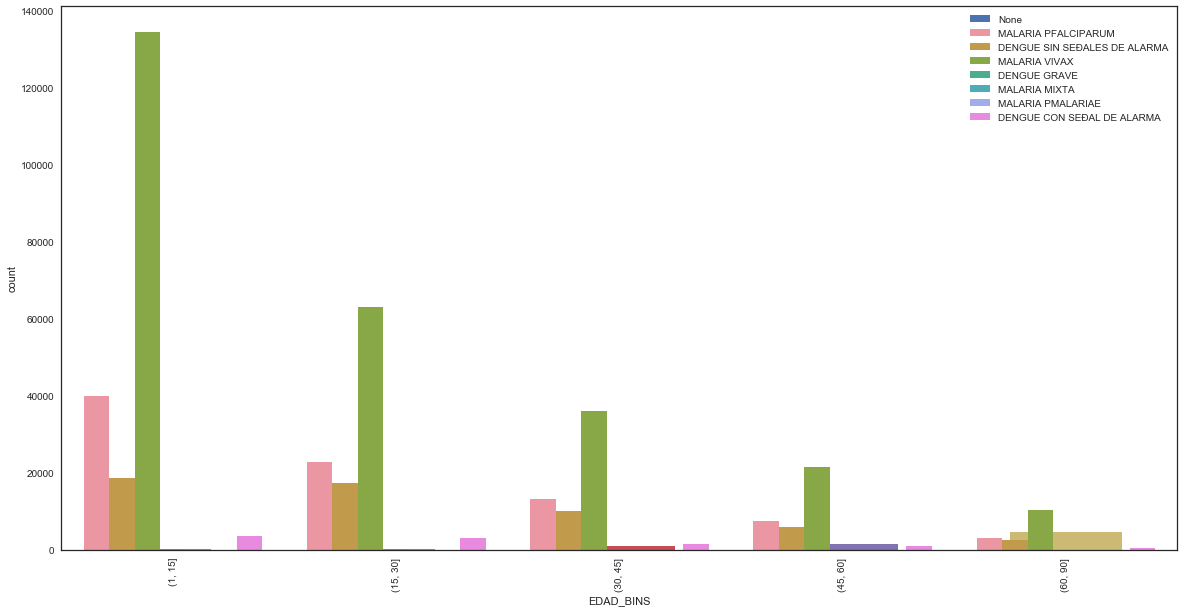

In [37]:
data_mosquito.groupby(by=['Disease','Year']).size().plot(kind='bar')
#df.groupby('column1').size().plot(kind='bar')
import seaborn as sns

ax = sns.countplot(x="EDAD_BINS", hue="DIAGNO", data=data_mosquito)
fig=ax.get_figure()
ax.figure.set_size_inches(20,10)
ax.legend(loc='upper right')
fig.savefig('EDAD_DIAGNO')

### 3. Disease counts by years and Diagnosis

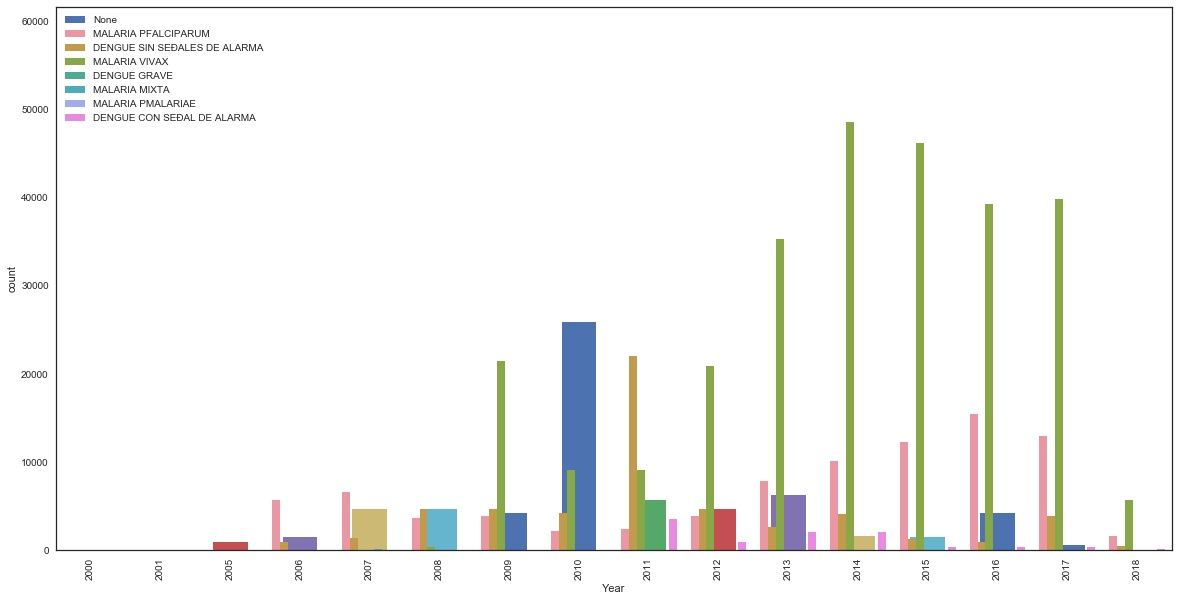

In [39]:
data_mosquito.groupby(by=['Disease','Year']).size().plot(kind='bar')
#df.groupby('column1').size().plot(kind='bar')
import seaborn as sns

ax = sns.countplot(x="Year", hue="DIAGNO", data=data_mosquito)
fig=ax.get_figure()
ax.figure.set_size_inches(20,10)
ax.legend(loc='upper left')
#plt.setp(ax.get_legend().get_title(), fontsize='50')
fig.savefig('YEAR_DIAGNO')

### 3. Disease counts by age bins and Disease type

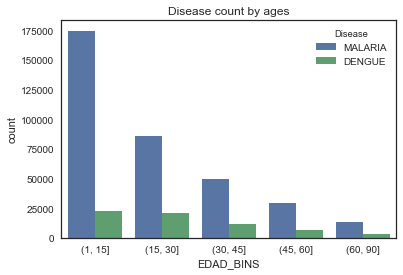

In [40]:
#f, ax = plt.plot()
ax = sns.countplot(x="EDAD_BINS", hue="Disease", data=data_mosquito)
ax.set_title('Disease count by ages')
fig=ax.get_figure()
fig.savefig('EDAD_Disease')
#f.savefig('EDAD_Disease')
#swarm_plot = sns.swarmplot(...)
#fig = swarm_plot.get_figure()
#fig.savefig(...)

### 4. Disease counts by sex and Disease type

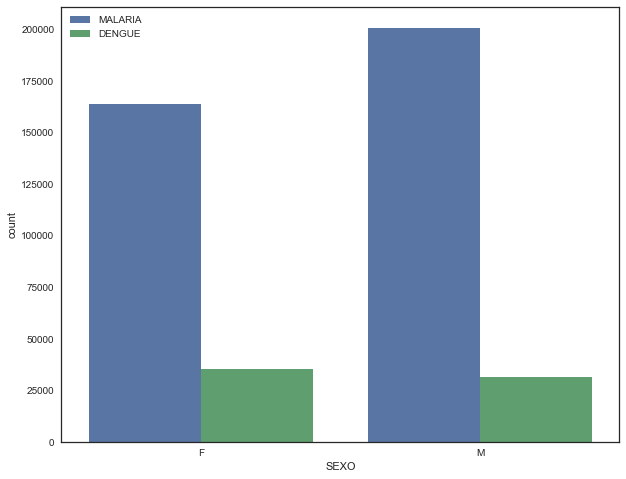

In [42]:
#ax = sns.countplot(x="SEXO", hue="DIAGNO", data=data_mosquito)
ax = sns.countplot(x="SEXO", hue="Disease", data=data_mosquito)
fig=ax.get_figure()
ax.figure.set_size_inches(10,8)
ax.legend(loc='upper left')
fig.savefig('SEXO_Disease')

### 5. Disease counts by years and Diagnosis

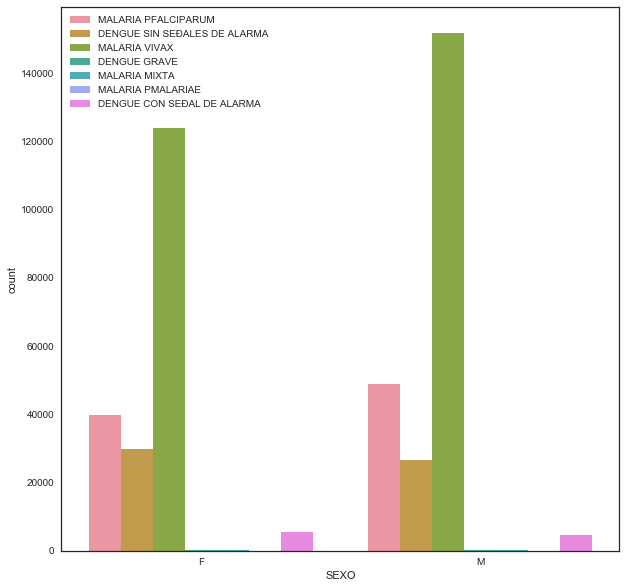

In [43]:
#ax = sns.countplot(x="SEXO", hue="DIAGNO", data=data_mosquito)
ax = sns.countplot(x="SEXO", hue="DIAGNO", data=data_mosquito)
fig=ax.get_figure()
ax.figure.set_size_inches(10,10)
ax.legend(loc='upper left')
fig.savefig('SEXO_DIAGNO')

### 6. Disease counts by Disease type and Diagnosis

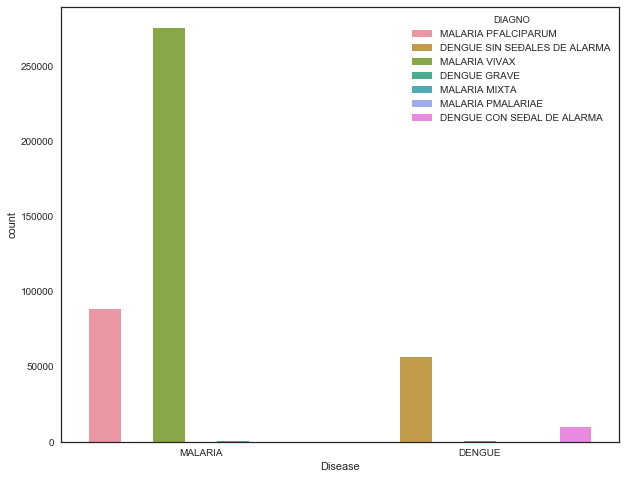

In [44]:
#ax = sns.countplot(x="Season", hue="Disease", data=data_mosquito)
ax = sns.countplot(x="Disease", hue="DIAGNO", data=data_mosquito)
fig=ax.get_figure()
ax.figure.set_size_inches(10,8)
fig.savefig('Disease_DIAGNO')

### 7. Disease counts by Disease type and Month

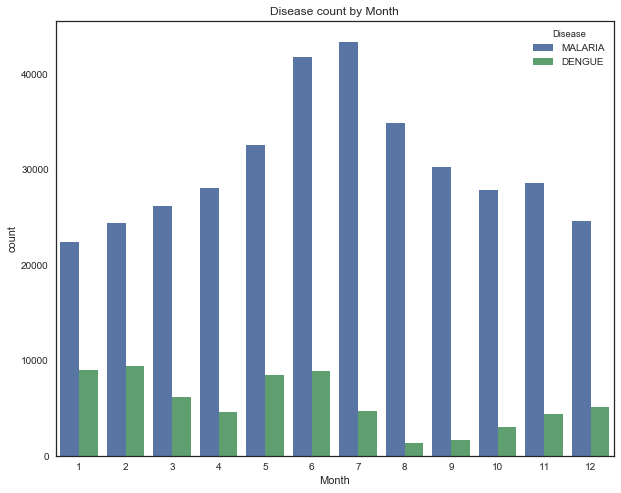

In [45]:
ax = sns.countplot(x="Month", hue="Disease", data=data_mosquito)
ax.set_title('Disease count by Month')
ax.figure.set_size_inches(10,8)
fig=ax.get_figure()
fig.savefig('Month_Disease')

### 8. Disease counts by Diagnosis and Month

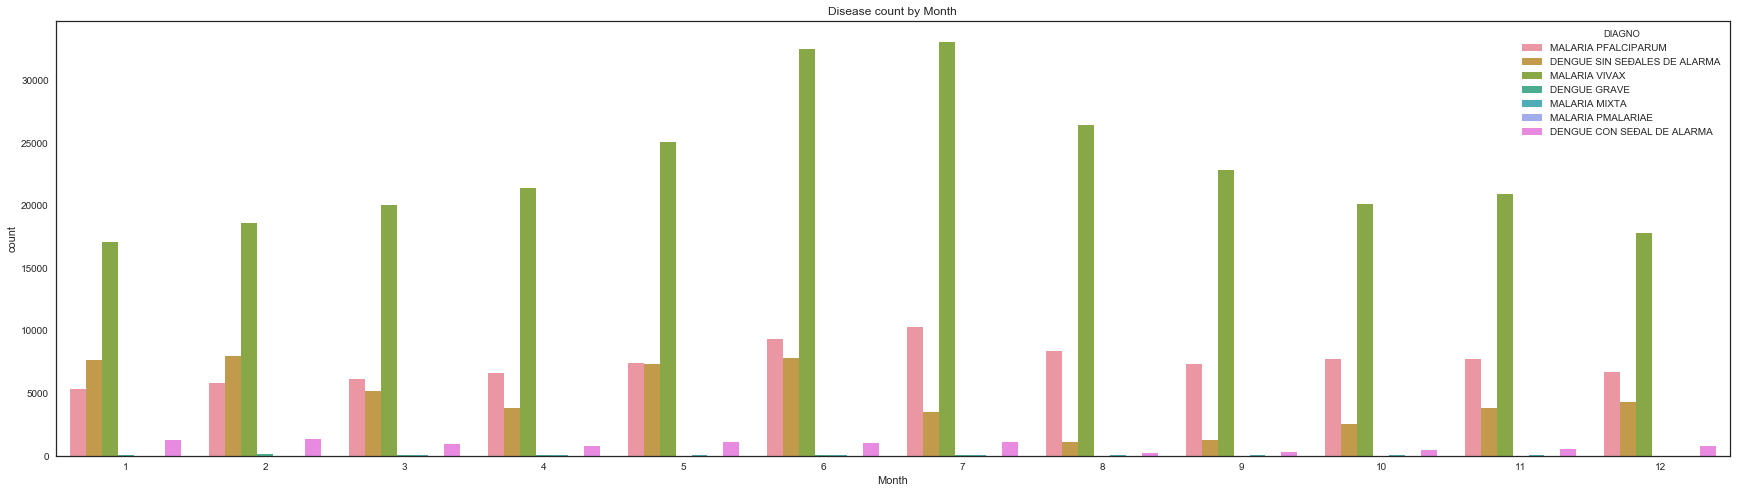

In [46]:
ax = sns.countplot(x="Month", hue="DIAGNO", data=data_mosquito)
ax.set_title('Disease count by Month')
ax.figure.set_size_inches(30,8)
fig=ax.get_figure()
fig.savefig('Month_DIAGNO')

### 9. Disease counts by Disease type and Season

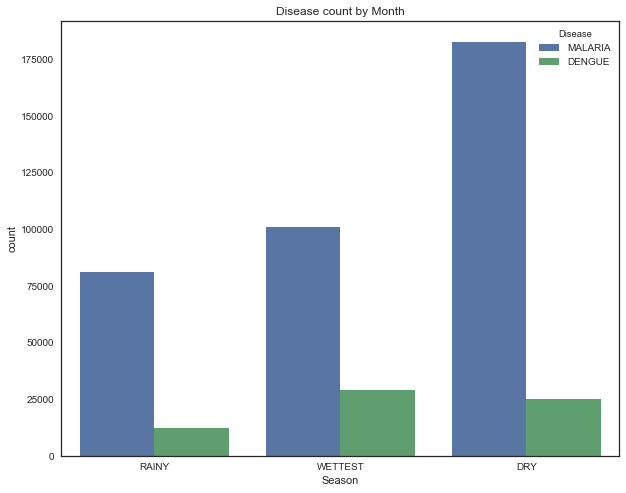

In [48]:
ax = sns.countplot(x="Season", hue="Disease", data=data_mosquito)
ax.set_title('Disease count by Month')
ax.figure.set_size_inches(10,8)
fig=ax.get_figure()
fig.savefig('Season_Disease')

### 9. Disease counts by Diagnosis and Season

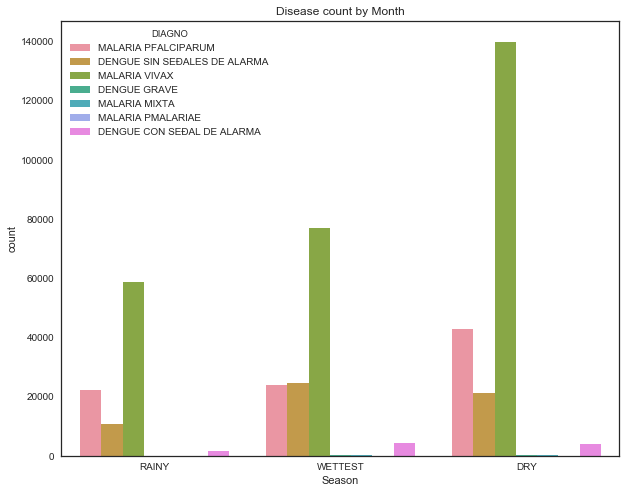

In [49]:
ax = sns.countplot(x="Season", hue="DIAGNO", data=data_mosquito)
ax.set_title('Disease count by Month')
ax.figure.set_size_inches(10,8)
fig=ax.get_figure()
fig.savefig('Season_DIAGNO')

## Draft plots

### Plot Attempts with bokeh

In [34]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("colormapped_bars.html")

diseases=list(set(data_mosquito['DIAGNO']))

counts = data_mosquito['DIAGNO'].value_counts()
counts=list(counts.values)

source = ColumnDataSource(data=dict(diseases=diseases, counts=counts))

p = figure(x_range=diseases, plot_height=3000, toolbar_location=None, title="diseases Counts")
p.vbar(x='diseases', top='counts', width=3, source=source, legend="diseases",
       line_color='white', fill_color=factor_cmap('diseases', palette=Spectral6, factors=diseases))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

#show(p)

/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['DENGUE CON SEÐAL DE ALARMA'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [ ]:
# Diseases counts by year

from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("dodged_bars.html")

#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
#years = ['2015', '2016', '2017']

diseases=list(set(data_mosquito['DIAGNO']))

counts = data_mosquito['DIAGNO'].value_counts()
counts=list(counts.values)


years=list(set(data_mosquito['Year']))
years

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

source = ColumnDataSource(data=data)

p = figure(x_range=fruits, y_range=(0, 10), plot_height=250, title="Fruit Counts by Year",
           toolbar_location=None, tools="")

p.vbar(x=dodge('fruits', -0.25, range=p.x_range), top='2015', width=0.2, source=source,
       color="#c9d9d3", legend=value("2015"))

p.vbar(x=dodge('fruits',  0.0,  range=p.x_range), top='2016', width=0.2, source=source,
       color="#718dbf", legend=value("2016"))

p.vbar(x=dodge('fruits',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
       color="#e84d60", legend=value("2017"))

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

#show(p)

### Pairwise comparisons

In [ ]:
#iris = sns.load_dataset("iris")
#sns.pairplot(iris);

In [ ]:
#sns.jointplot(x="x", y="y", data=data_mosquito, kind="kde");

### Categorical plots with seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [ ]:
data_mosquito.head()

In [ ]:
#sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

#diamonds = sns.load_dataset("diamonds")
#sns.catplot(x="color", y="price", kind="boxen",
           # data=diamonds.sort_values("color"));

In [ ]:
#titanic = sns.load_dataset("titanic")
#sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);
#sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);